
🔹 **Original Predicted EV Sales (Before Scenarios):**
           ds          yhat
11 2021-01-01  2.080558e+07
12 2022-01-01  2.416072e+07
13 2023-01-01  2.735153e+07
14 2024-01-01  3.012804e+07
15 2025-01-01  3.335090e+07
16 2026-01-01  3.553828e+07
17 2027-01-01  3.705263e+07
18 2028-01-01  3.795829e+07
19 2029-01-01  3.938045e+07
20 2030-01-01  4.001461e+07

🔹 **Original Predicted Lithium Production (Before Scenarios):**
           ds           yhat
19 2014-01-01   31750.282763
20 2015-01-01   36012.711124
21 2016-01-01   41121.816468
22 2017-01-01   47055.505349
23 2018-01-01   54798.403803
24 2019-01-01   64303.943036
25 2020-01-01   76061.407753
26 2021-01-01   97439.814094
27 2022-01-01  117792.438975
28 2023-01-01  143596.854320

🔹 **EV Sales Forecast - High Growth Scenario:**
           ds  Final_Forecast
11 2021-01-01    2.704725e+07
12 2022-01-01    3.140894e+07
13 2023-01-01    3.555699e+07
14 2024-01-01    3.916646e+07
15 2025-01-01    4.335617e+07
16 2026-01-01    4.61997

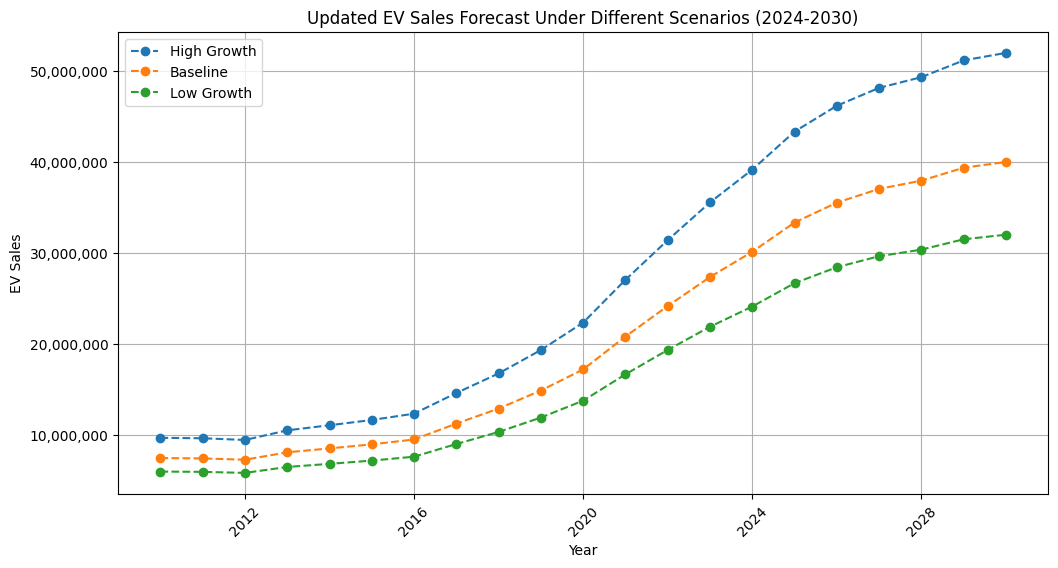

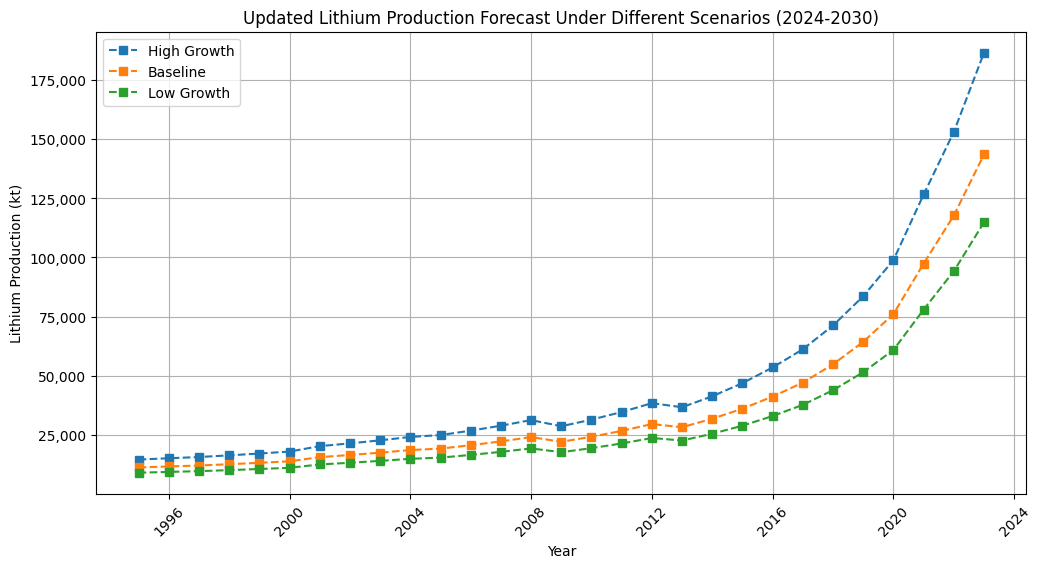

✅ Saved: C:\Users\MSI\Desktop\Critical_mineral\Output\Updated_EV_Sales_Forecast_High Growth.csv
✅ Saved: C:\Users\MSI\Desktop\Critical_mineral\Output\Updated_EV_Sales_Forecast_Baseline.csv
✅ Saved: C:\Users\MSI\Desktop\Critical_mineral\Output\Updated_EV_Sales_Forecast_Low Growth.csv
✅ Saved: C:\Users\MSI\Desktop\Critical_mineral\Output\Updated_Lithium_Production_Forecast_High Growth.csv
✅ Saved: C:\Users\MSI\Desktop\Critical_mineral\Output\Updated_Lithium_Production_Forecast_Baseline.csv
✅ Saved: C:\Users\MSI\Desktop\Critical_mineral\Output\Updated_Lithium_Production_Forecast_Low Growth.csv

✅ All Updated Forecasts Processed Successfully!


In [4]:
# ✅ Import Required Libraries  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# ✅ Load the Predicted EV Sales Forecast
file_path_predicted_ev = r"C:\Users\MSI\Desktop\Critical_mineral\Output\EV_forecast_2030.csv"
file_path_lithium_forecast = r"C:\Users\MSI\Desktop\Critical_mineral\Output\Lithium_forecast_final_2030.csv"

# ✅ Load CSVs with error handling
try:
    predicted_ev_data = pd.read_csv(file_path_predicted_ev, encoding="utf-8")
    lithium_forecast_data = pd.read_csv(file_path_lithium_forecast, encoding="utf-8")
except UnicodeDecodeError:
    predicted_ev_data = pd.read_csv(file_path_predicted_ev, encoding="latin1")
    lithium_forecast_data = pd.read_csv(file_path_lithium_forecast, encoding="latin1")

# ✅ Rename Columns for Consistency
if "year" in predicted_ev_data.columns:
    predicted_ev_data.rename(columns={"year": "ds"}, inplace=True)

if "predicted_ev_sales" in predicted_ev_data.columns:
    predicted_ev_data.rename(columns={"predicted_ev_sales": "yhat"}, inplace=True)

# ✅ Convert Date Column
predicted_ev_data["ds"] = pd.to_datetime(predicted_ev_data["ds"], errors="coerce")
lithium_forecast_data["ds"] = pd.to_datetime(lithium_forecast_data["ds"], errors="coerce")

# ✅ Ensure 'yhat' is Numeric
for df, name in zip([predicted_ev_data, lithium_forecast_data], ["EV Sales", "Lithium"]):
    if "yhat" not in df.columns:
        raise KeyError(f"❌ Error: 'yhat' column missing in {name} data.")
    df["yhat"] = pd.to_numeric(df["yhat"], errors="coerce")

# ✅ Fix Date Consistency (Ensure Only One Forecast Per Year)
lithium_forecast_data = lithium_forecast_data[lithium_forecast_data["ds"].dt.month == 1]

# ✅ PRINT Original Predicted Results Before Scenarios
print("\n🔹 **Original Predicted EV Sales (Before Scenarios):**")
print(predicted_ev_data[["ds", "yhat"]].tail(10))  

print("\n🔹 **Original Predicted Lithium Production (Before Scenarios):**")
print(lithium_forecast_data[["ds", "yhat"]].tail(10))  

# ✅ Define Scenario Adjustments
scenarios = {
    "High Growth": 1.3,
    "Baseline": 1.0,
    "Low Growth": 0.8
}

# ✅ Apply Scenario-Based Adjustments to EV Sales & Lithium Production
scenario_forecasts_ev, scenario_forecasts_lithium = {}, {}

for scenario, factor in scenarios.items():
    ev_scenario_data = predicted_ev_data.copy()
    li_scenario_data = lithium_forecast_data.copy()
    
    # Apply growth factor
    ev_scenario_data["Final_Forecast"] = ev_scenario_data["yhat"] * factor
    li_scenario_data["Final_Forecast"] = li_scenario_data["yhat"] * factor

    # Clip negative values
    ev_scenario_data["Final_Forecast"] = ev_scenario_data["Final_Forecast"].clip(lower=0)
    li_scenario_data["Final_Forecast"] = li_scenario_data["Final_Forecast"].clip(lower=0)
    
    # Store in dictionaries
    scenario_forecasts_ev[scenario] = ev_scenario_data
    scenario_forecasts_lithium[scenario] = li_scenario_data

    # ✅ PRINT Adjusted Predictions After Scenario Scaling
    print(f"\n🔹 **EV Sales Forecast - {scenario} Scenario:**")
    print(ev_scenario_data[["ds", "Final_Forecast"]].tail(10))  

    print(f"\n🔹 **Lithium Production Forecast - {scenario} Scenario:**")
    print(li_scenario_data[["ds", "Final_Forecast"]].tail(10))  

# ✅ Plot the Updated EV Sales Forecasts
plt.figure(figsize=(12, 6))
for scenario, data in scenario_forecasts_ev.items():
    plt.plot(data["ds"], data["Final_Forecast"], label=scenario, linestyle='--', marker='o')

plt.title("Updated EV Sales Forecast Under Different Scenarios (2024-2030)")
plt.xlabel("Year")
plt.ylabel("EV Sales")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:,.0f}"))
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# ✅ Plot the Updated Lithium Production Forecasts
plt.figure(figsize=(12, 6))
for scenario, data in scenario_forecasts_lithium.items():
    plt.plot(data["ds"], data["Final_Forecast"], label=scenario, linestyle='--', marker='s')

plt.title("Updated Lithium Production Forecast Under Different Scenarios (2024-2030)")
plt.xlabel("Year")
plt.ylabel("Lithium Production (kt)")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:,.0f}"))
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# ✅ Import Required Libraries
import os
import pandas as pd

# ✅ Define the Correct Output Directory
output_directory = r"C:\Users\MSI\Desktop\Critical_mineral\Output"

# ✅ Check if the directory exists (Not needed if it already exists, but for safety)
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# ✅ Try to Save EV Sales Forecasts
for scenario, data in scenario_forecasts_ev.items():
    try:
        file_path = os.path.join(output_directory, f"Updated_EV_Sales_Forecast_{scenario}.csv")
        data.to_csv(file_path, index=False)
        print(f"✅ Saved: {file_path}")
    except Exception as e:
        print(f"❌ Error saving EV forecast for {scenario}: {e}")

# ✅ Try to Save Lithium Production Forecasts
for scenario, data in scenario_forecasts_lithium.items():
    try:
        file_path = os.path.join(output_directory, f"Updated_Lithium_Production_Forecast_{scenario}.csv")
        data.to_csv(file_path, index=False)
        print(f"✅ Saved: {file_path}")
    except Exception as e:
        print(f"❌ Error saving Lithium forecast for {scenario}: {e}")

print("\n✅ All Updated Forecasts Processed Successfully!")


